LIBRARIES

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.sparse as sp
from scipy.sparse.linalg import svds

EDA AND PRE-PROCESSING

In [13]:
df=pd.read_csv("imdb_top_1000.csv")
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,User_Id
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"2,83,41,469",0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"13,49,66,411",1
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"53,48,58,444",2
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"5,73,00,000",3
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"43,60,000",4


In [14]:
#As per analysis we observe that poster link is of no use so we can drop it
df.drop(columns=["Poster_Link"],inplace=True)
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,User_Id
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"2,83,41,469",0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"13,49,66,411",1
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"53,48,58,444",2
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"5,73,00,000",3
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"43,60,000",4


In [15]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1000 non-null   object 
 1   Released_Year  1000 non-null   object 
 2   Certificate    899 non-null    object 
 3   Runtime        1000 non-null   object 
 4   Genre          1000 non-null   object 
 5   IMDB_Rating    1000 non-null   float64
 6   Overview       1000 non-null   object 
 7   Meta_score     843 non-null    float64
 8   Director       1000 non-null   object 
 9   Star1          1000 non-null   object 
 10  Star2          1000 non-null   object 
 11  Star3          1000 non-null   object 
 12  Star4          1000 non-null   object 
 13  No_of_Votes    1000 non-null   int64  
 14  Gross          831 non-null    object 
 15  User_Id        1000 non-null   int64  
dtypes: float64(2), int64(2), object(12)
memory usage: 125.1+ KB


Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
User_Id            0
dtype: int64

In [16]:
#we see that columns like certificate,metascore and gross has nan values
#to deal with this we can drop nan values as it is smaller compared to the Number of tuples
df=df.dropna(subset=["Gross","Certificate","Meta_score"])


In [17]:
df.isna().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
User_Id          0
dtype: int64

In [18]:
#count the successful movies interms of meta score and gross

In [21]:
df1=df[["Meta_score","Gross"]]
df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Meta_score  714 non-null    float64
 1   Gross       714 non-null    object 
dtypes: float64(1), object(1)
memory usage: 16.7+ KB


In [24]:
succ= df1[df1['Meta_score'] >= 77]
succ["Gross"]=succ["Gross"].str.replace(',','').astype(float)
succ["just"] = succ["Gross"] >= 7.5e+07
succ

C:\Users\anavi\AppData\Local\Temp\ipykernel_13688\1822662051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  succ["Gross"]=succ["Gross"].str.replace(',','').astype(float)
C:\Users\anavi\AppData\Local\Temp\ipykernel_13688\1822662051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  succ["just"] = succ["Gross"] >= 7.5e+07


,Meta_score,Gross,just
0,80.0,28341469.0,False
1,100.0,134966411.0,True
2,84.0,534858444.0,True
3,90.0,57300000.0,False
4,96.0,4360000.0,False
...,...,...,...
988,90.0,132088635.0,True
989,87.0,959000.0,False
990,77.0,696690.0,False
994,96.0,13780024.0,False


Text(0.5, 0.98, 'Count Of Successful movies in both Metascore and Gross')

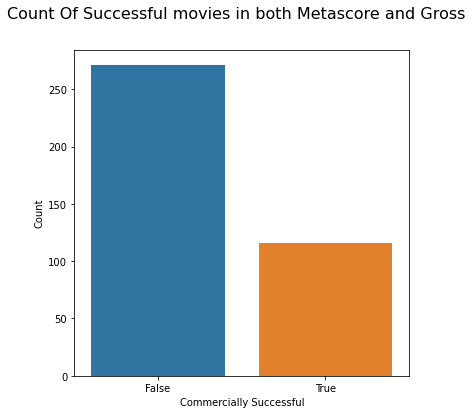

In [25]:
plotting_dataframe = succ['just'].value_counts().to_frame(name='count')
plotting_dataframe = plotting_dataframe.reset_index()
plotting_dataframe.rename(columns={'index':'Commercially Successful','count':'Count'}, inplace=True)

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.barplot(data=plotting_dataframe, x='Commercially Successful', y='Count')
fig.suptitle('Count Of Successful movies in both Metascore and Gross', fontsize=16)

In [26]:
#correlation between the meta score and IMDB ratings


In [27]:
corr_df = df[['IMDB_Rating','Meta_score']]
corr_df.dropna(inplace=True)
corr_df.head()

C:\Users\anavi\AppData\Local\Temp\ipykernel_13688\1117937414.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df.dropna(inplace=True)


,IMDB_Rating,Meta_score
0,9.3,80.0
1,9.2,100.0
2,9.0,84.0
3,9.0,90.0
4,9.0,96.0


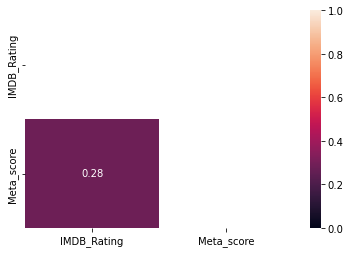

In [28]:
mk= np.triu(corr_df.corr())
ax = sns.heatmap(corr_df.corr(), mask=mk, annot=True, vmin=0, vmax=1)

In [29]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,User_Id
0,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"2,83,41,469",0
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"13,49,66,411",1
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"53,48,58,444",2
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"5,73,00,000",3
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"43,60,000",4


LIBRARIES

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load the dataset
data = pd.read_csv("imdb_top_1000.csv")

# Preprocess the data
data['Overview'] = data['Overview'].str.lower()
data['Overview'] = data['Overview'].str.replace('[^\w\s]','')

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the vectorizer on the movie overviews
tfidf_matrix = vectorizer.fit_transform(data['Overview'])

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

CONTENT BASED RECOMMENDER SYSTEM

In [30]:
# Define a function to get the top N recommendations
def get_recommendations(title, cosine_sim, data, N):
    # Get the index of the movie
    idx = data[data['Series_Title'] == title].index[0]
    # Get the pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the top N recommendations
    top_movies = [i[0] for i in sim_scores[1:N+1]]
    return data.iloc[top_movies]

C:\Users\anavi\AppData\Local\Temp\ipykernel_13688\219827522.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Overview'] = data['Overview'].str.replace('[^\w\s]','')


In [31]:
#Result

In [32]:
# Get recommendations for the movie "The Godfather"
recommendations = get_recommendations('The Godfather', cosine_sim, data, 5)
recommendations.head(11)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,User_Id
463,https://m.media-amazon.com/images/M/MV5BMGUwZj...,Knives Out,2019,UA,130 min,"Comedy, Crime, Drama",7.9,a detective investigates the death of a patria...,82.0,Rian Johnson,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,454203,"16,53,59,751",463
974,https://m.media-amazon.com/images/M/MV5BNWFlYW...,The Godfather: Part III,1990,A,162 min,"Crime, Drama",7.6,follows michael corleone now in his 60s as he ...,60.0,Francis Ford Coppola,Al Pacino,Diane Keaton,Andy Garcia,Talia Shire,359809,"6,66,66,062",974
739,https://m.media-amazon.com/images/M/MV5BOGQzOD...,Nebraska,2013,UA,115 min,"Adventure, Comedy, Drama",7.7,an aging boozeaddled father makes the trip fro...,87.0,Alexander Payne,Bruce Dern,Will Forte,June Squibb,Bob Odenkirk,112298,"1,76,54,912",739
913,https://m.media-amazon.com/images/M/MV5BMzc0Zm...,Die Welle,2008,NaN,107 min,"Drama, Thriller",7.6,a high school teachers experiment to demonstra...,NaN,Dennis Gansel,Jürgen Vogel,Frederick Lau,Max Riemelt,Jennifer Ulrich,102742,NaN,913
628,https://m.media-amazon.com/images/M/MV5BNjQ0NT...,The Curious Case of Benjamin Button,2008,UA,166 min,"Drama, Fantasy, Romance",7.8,tells the story of benjamin button a man who s...,70.0,David Fincher,Brad Pitt,Cate Blanchett,Tilda Swinton,Julia Ormond,589160,"12,75,09,326",628


In [33]:
data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,User_Id
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"2,83,41,469",0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,an organized crime dynastys aging patriarch tr...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"13,49,66,411",1
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,when the menace known as the joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"53,48,58,444",2
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,the early life and career of vito corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"5,73,00,000",3
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,a jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"43,60,000",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,a young new york socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,995
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,sprawling epic covering the life of a texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,996
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,in hawaii in 1941 a private is cruelly punishe...,85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"3,05,00,000",997
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,998


In [34]:
def evaluate_recommendations(cosine_sim, data, N):
    # Initialize the evaluation metrics
    precision = 0
    recall = 0
    f1_score = 0
    num_items = 0
    # Loop over each item in the data
    for idx, item in data.iterrows():
        # Get the items that are similar to the current item
        similar_items = set(get_recommendations(item['Series_Title'], cosine_sim, data, N)['Series_Title'])
        # Get the relevant items for the current item
        relevant_items = set(data[data['Series_Title'] == item['Series_Title']]['Series_Title'])
        # Calculate the evaluation metrics for the item
        if len(similar_items) > 0:
            precision += len(relevant_items.intersection(similar_items)) / len(similar_items)
            recall += len(relevant_items.intersection(similar_items)) / len(relevant_items)
            f1_score += 2 * (len(relevant_items.intersection(similar_items)) / (len(similar_items) + len(relevant_items)))
            num_items += 1
    # Calculate the average evaluation metrics across all items
    precision /= num_items
    recall /= num_items
    f1_score /= num_items
    return precision, recall, f1_score

In [35]:
# Evaluate the recommendation system
precision, recall, f1_score = evaluate_recommendations(cosine_sim, data, 5)

# Print the evaluation metrics
print('Precision: {:.2f}%'.format(precision * 100))
print('Recall: {:.2f}%'.format(recall * 100))
print('F1-score: {:.2f}%'.format(f1_score * 100))


Precision: 0.04%
Recall: 0.20%
F1-score: 0.07%


model based collaborative filtering

In [37]:
import numpy as np 
import pandas as pd 
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize

In [38]:
# Load the dataset into a pandas dataframe
data=pd.read_csv("imdb_top_1000.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
 16  User_Id        1000 non-null   int64  
dtypes: float64(2), int64(2), object(13)
memory usage: 132

In [39]:
# Convert data to sparse matrix
data_sparse = csr_matrix((np.ones(len(data)), (data['Series_Title'].astype('category').cat.codes,
                                               data['Director'].astype('category').cat.codes)))
data_sparse

<999x548 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [40]:
# Reduce dimensionality with k-means clustering
kmeans = KMeans(n_clusters=50)
clusters = kmeans.fit_predict(data_sparse)

In [41]:
# Calculate pairwise cosine similarities between items
data_dense = data_sparse.toarray()
data_dense = normalize(data_dense, axis=0)
item_similarity = cosine_similarity(data_dense.T)

In [42]:
# Make recommendations
def make_recommendations(item_id, data,item_similarity, n_recommendations=10):
    # Get similarity scores for item
    item_scores = item_similarity[item_id]

    # Get indices of top n most similar items
    top_indices = np.argsort(-item_scores)[:n_recommendations]

    # Get top n most similar items and their scores
    top_items = [(data['Series_Title'].iloc[i], data['Director'].iloc[i], item_scores[i]) for i in top_indices]

    return top_items

In [43]:
# Choose an item ID to make recommendations for
item_id = 10  # For example

# Call the make_recommendations function to get a list of recommended items
recommended_items = make_recommendations(item_id,data, item_similarity)

# Print the recommended items
print("Recommended items for item {}:\n".format(item_id))
for i, item in enumerate(recommended_items):
    print("{}) {} by {} (score: {})".format(i+1, item[0], item[1], item[2]))

Recommended items for item 10:

1) The Lord of the Rings: The Fellowship of the Ring by Peter Jackson (score: 1.0)
2) The Shawshank Redemption by Frank Darabont (score: 0.0)
3) The Bourne Ultimatum by Paul Greengrass (score: 0.0)
4) Bin-jip by Ki-duk Kim (score: 0.0)
5) Sin City by Frank Miller (score: 0.0)
6) Le scaphandre et le papillon by Julian Schnabel (score: 0.0)
7) G.O.R.A. by Ömer Faruk Sorak (score: 0.0)
8) Blood Diamond by Edward Zwick (score: 0.0)
9) Ratatouille by Brad Bird (score: 0.0)
10) Kill Bill: Vol. 2 by Quentin Tarantino (score: 0.0)


In [44]:
def evaluate_recommendations(cosine_sim, data, N):
    # Initialize the evaluation metrics
    precision = 0
    recall = 0
    f1_score = 0
    num_items = 0
    # Loop over each item in the data
    for idx, item in data.iterrows():
        # Get the items that are similar to the current item
        similar_items = set(make_recommendations(item_id,data,item_similarity, n_recommendations=10)[9])
        # Get the relevant items for the current item
        relevant_items = set(data[data['Series_Title'] == item['Series_Title']]['Series_Title'])
        # Calculate the evaluation metrics for the item
        if len(similar_items) > 0:
            precision += len(relevant_items.intersection(similar_items)) / len(similar_items)
            recall += len(relevant_items.intersection(similar_items)) / len(relevant_items)
            f1_score += 2 * (len(relevant_items.intersection(similar_items)) / (len(similar_items) + len(relevant_items)))
            num_items += 1
    # Calculate the average evaluation metrics across all items
    precision /= num_items
    recall /= num_items
    f1_score /= num_items
    return precision, recall, f1_score

In [45]:
# Evaluate the recommendation system
precision, recall, f1_score = evaluate_recommendations(item_similarity, data, 5)

# Print the evaluation metrics
print('Precision: {:.2f}%'.format(precision * 100))
print('Recall: {:.2f}%'.format(recall * 100))
print('F1-score: {:.2f}%'.format(f1_score * 100))

Precision: 0.03%
Recall: 0.10%
F1-score: 0.05%
